# Heavy element nucleysynthesis along the $\beta-$stability valey



In [105]:
import numpy as np
import matplotlib.pyplot as plt

In [106]:
def s_process_abundances(N56,tau_0,f,A,sigma_0):
    '''This function implements Claytons' analytical formula for s-process abundances. 
       Given: 
       - an initial seed composition of Iron: N56, 
       - a characteristic exposure time:      tau_0,
       - a value for the fraction of initial 
           seed nuclei that have been exposed 
           to an exponential distribution of
           neutron exposures,                 f, 
       -   a mass number                      A, 
       -   and a maxwellian-averaged neutron
           capture cross section for A,       sigma_0, 
       it returns the abundance times cross section for the most stable A isotope.
       It case an array of A and sigma_0 values is given,  it returns the abundance 
       distribution for all input elements
    '''   
    abundances = f*N56/tau_0 * np.cumprod(1/(1+1/(tau_0*sigma_0)))
    return abundances


#Here's also a convenient function for ploting the results
def plot_abundances(A,abundances,sigma_0,abundances_sol=None):
    plt.figure(figsize=(20,10))
    
    plt.subplot(2,1,1)
    plt.xlabel('Mass Number A',fontsize=18)
    plt.ylabel(r'$\log_{10} N_{\rm A}\langle \sigma\rangle/v_T\,(Si=10^6)$',fontsize=22)
    plt.plot(A,np.log10(abundances))
    if abundances_sol is not None:
        plt.scatter(abundances_sol[:,0],np.log10(abundances_sol[:,1]*abundances_sol[:,2])-0.7,s=60,color='blue')
        
    plt.subplot(2,1,2)
    plt.xlabel('Mass Number A',fontsize=18)
    plt.ylabel(r'$\log_{10} N_{\rm A},(Si=10^6)$',fontsize=22)
    plt.plot(A,np.log10(abundances/sigma_0))
    if abundances_sol is not None:
        plt.scatter(abundances_sol[:,0],np.log10(abundances_sol[:,1])-0.7,s=60,color='blue')
        

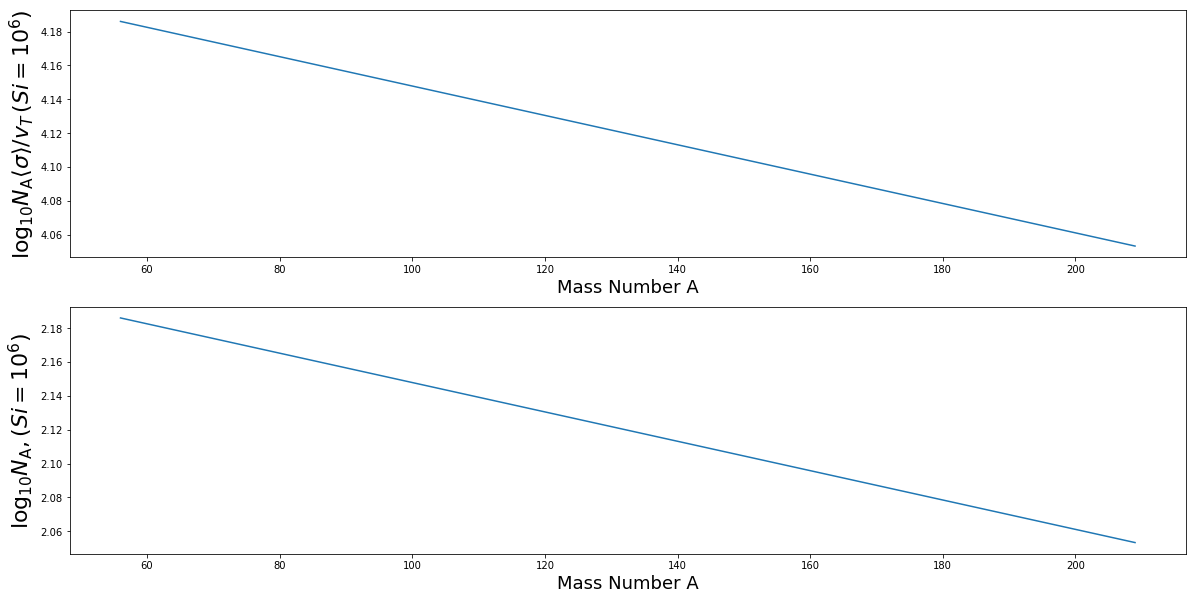

In [111]:
#Example 1. Let's consider nuclei with mass numbers from A=56 to A=209
A = np.arange(56,210,1) #210 because the function returns values inside [min,max)

#Let's now assume that all heavy elements have the same cross-section, sigma_0 = 100 mb
# we'll also set N56=768900 (solar system abundance) and tau_0=f=1

sigma_0 = np.ones_like(A)*100. 
#here I put a 'dot' to specify that this is a float, not an integer (100. == 100.0 in python)


abundances =s_process_abundances(768900,5.0,0.1,A,sigma_0)

# Plot of the results 
plot_abundances(A,abundances,sigma_0)


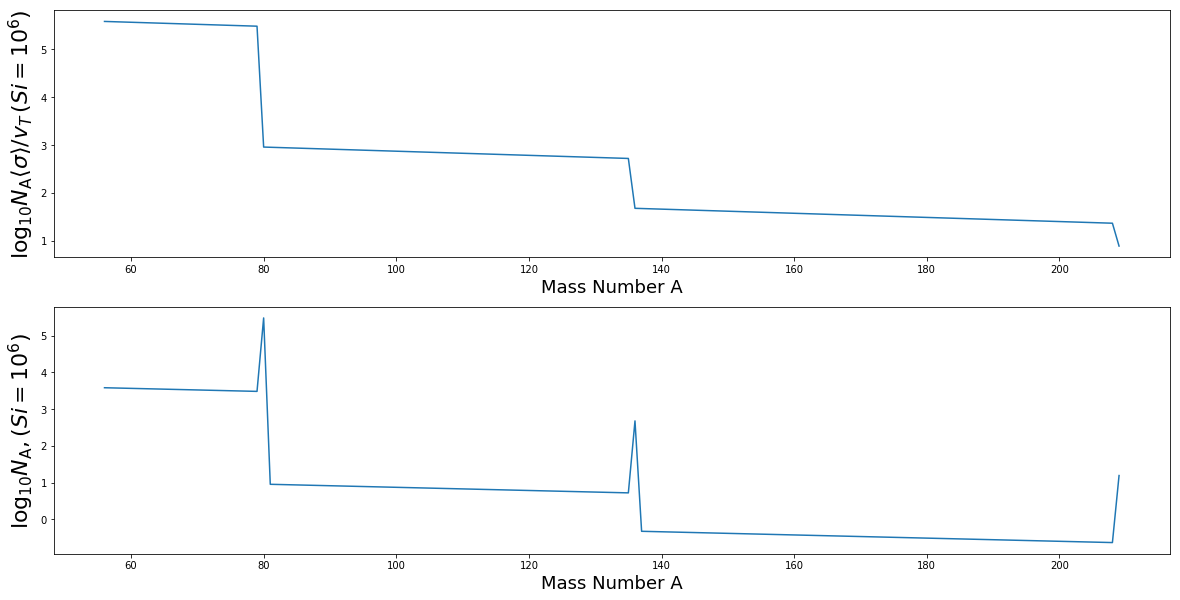

In [112]:
# Example 2. We know that cross sections at magic neutron numbers become very small. 
# So let's now try to set the corresponding values in the sigma_0 array to an arbitrary small number
# Magic numbers of interest are N= 50, 82, 126 which correspond to roughly A=82,138, 209 

sigma_0[np.where(A == 80)] = 0.003
sigma_0[np.where(A == 136)] = 0.1
sigma_0[np.where(A == 209)] = 0.5

abundances =s_process_abundances(768900,1.,0.5,A,sigma_0)
plot_abundances(A,abundances,sigma_0)

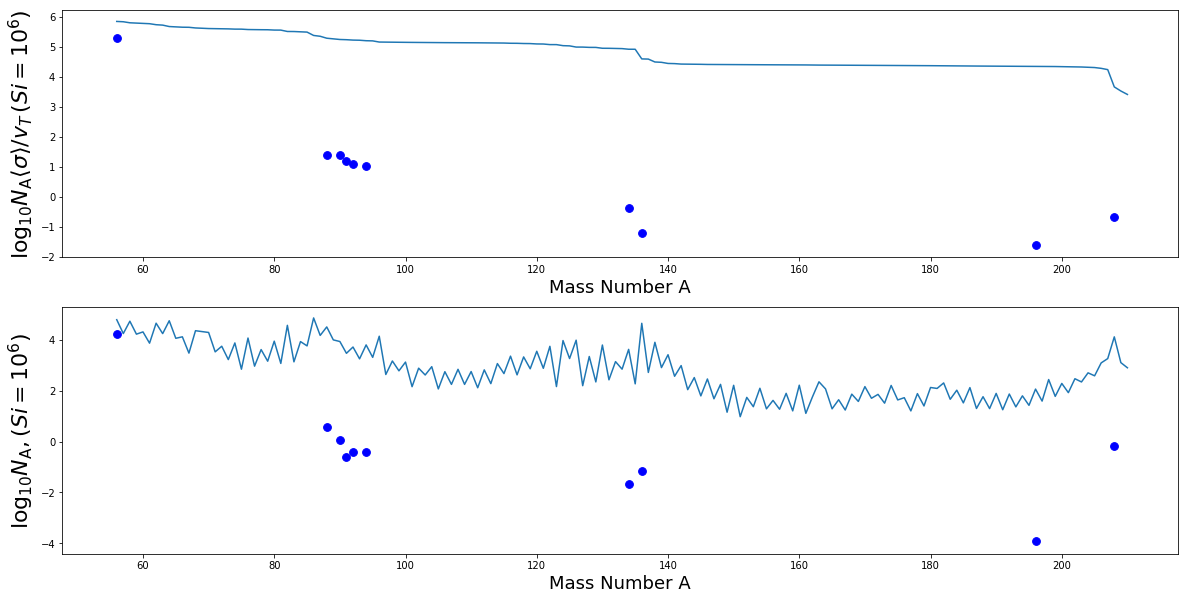

In [115]:
# The above seems much more realistic! 
#Only parts of the chain in-between neutron magic numbers seem to be in equilibrium
# When the cross section drops, so does the Nxsigma product for elements that come after
#But how does it compare with measurements? 
#The following loads solar system abundace for s-only elements + Iron (from Lodders 2003)
abundance_data =np.genfromtxt('solar_abundances.txt')
abundances =s_process_abundances(768900,1,1,A,sigma_0) #0.05,0.01 yield a 'resonble' fit
plot_abundances(A,abundances,sigma_0,abundance_data)

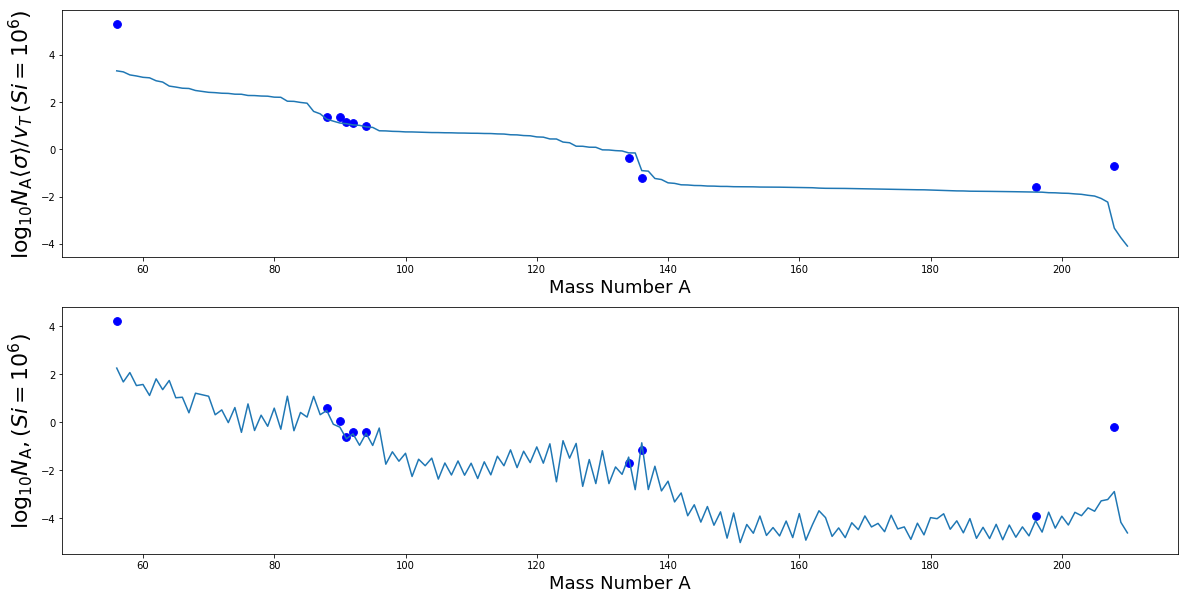

In [116]:
#ok, obviously, not very realistic....now let's use real data for sigma_0. 
#The following values (vs A) are from Bao et al. 2000: 
#https://www.sciencedirect.com/science/article/pii/S0092640X00908386

cross_section_data =np.genfromtxt('cross_section_data.txt')
A = cross_section_data[:,0]
sigma_0 = cross_section_data[:,1]
abundances =s_process_abundances(768900,0.24,0.0009,A,sigma_0)
plot_abundances(A,abundances,sigma_0,abundance_data)

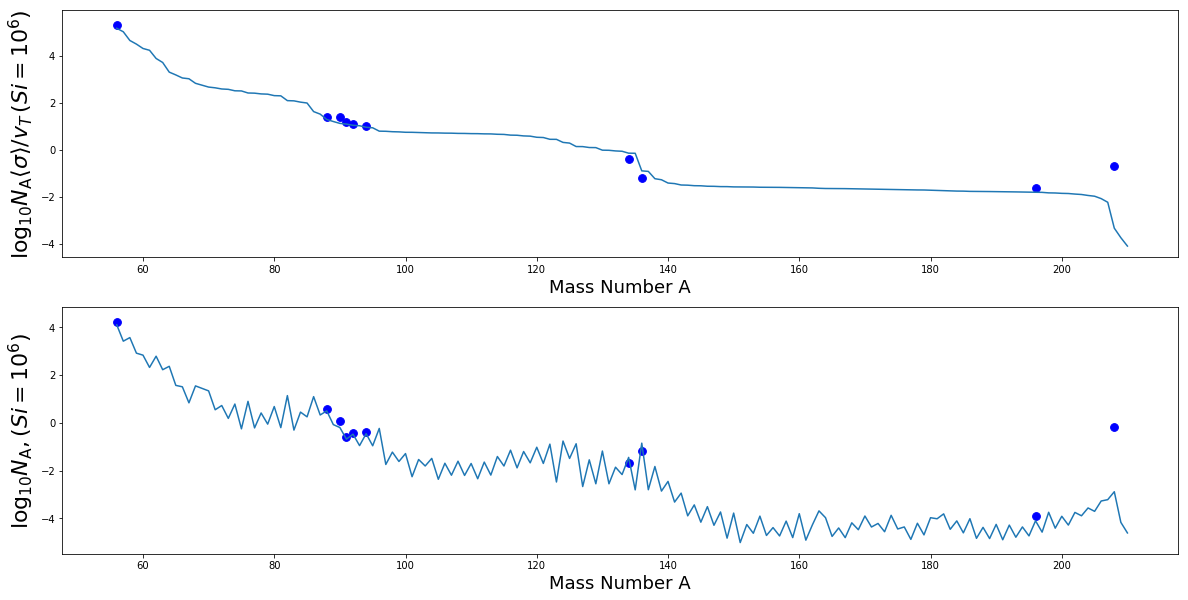

In [117]:
#The above values  do well for relatively low A, but there seems to be something missing!
#THAT'S FINE THOUGH! if one pair of tau, f is not enough, then we can add additional components.

# In fact, 2 components seem to suffice to reproduce the s-pure abundances. The tau, f values can be determined 
# directly from the data
abundances2 =s_process_abundances(768900,0.06,0.027,A,sigma_0)
plot_abundances(A,(abundances+abundances2),sigma_0,abundance_data)


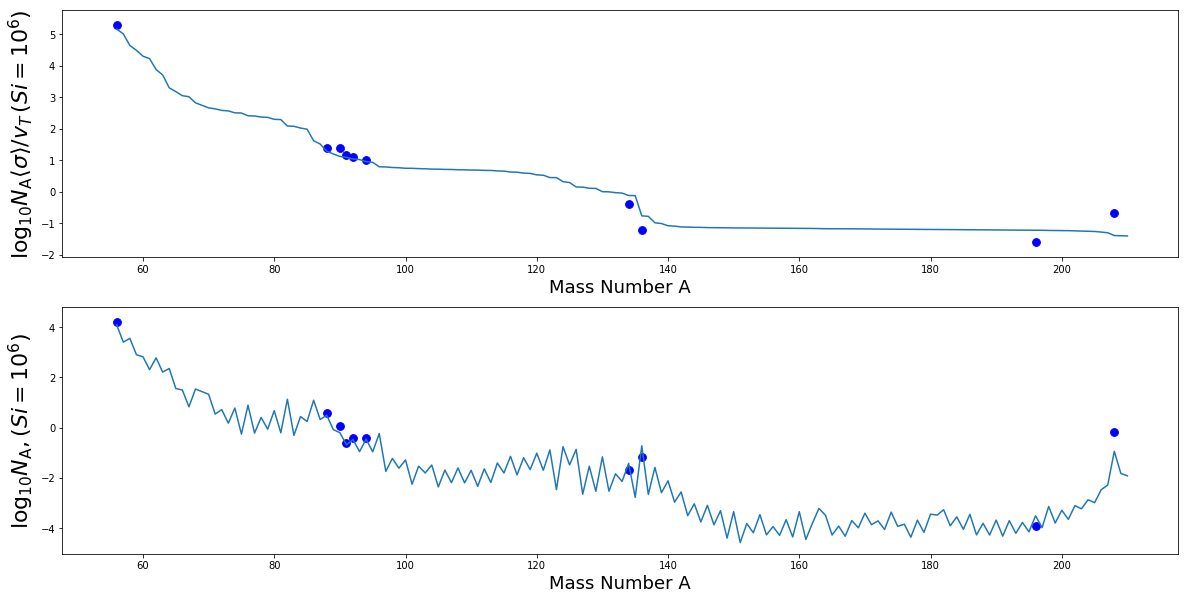

In [118]:
abundances3 = s_process_abundances(768900,30,2e-4/100.,A,sigma_0)
plot_abundances(A,(abundances+abundances2+abundances3),sigma_0,abundance_data)